# Importation des librairies et des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Remplace 'chemin_vers_fichier.pk' par le chemin de ton fichier .pk
# with open('/content/fichier_global.pk', 'rb') as fichier:
#     data = pickle.load(fichier)


with open('fichier_global.pk', 'rb') as fichier:
     data = pickle.load(fichier)


In [3]:
data.head()

,Solid_class,Element,Shape,Distance,Size_parameters,Eq_Radius,n_Atoms,qmin,qmax,qstep,b_iso,q,Intensities,polydispersity
0,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760072.0, 8737556.0, 8700139.0, 8647997.0, 8...",0
1,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.3,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760070.0, 8737548.0, 8700119.0, 8647962.0, 8...",0
2,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.5,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760067.0, 8737539.0, 8700101.0, 8647928.0, 8...",0
3,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.9,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760063.0, 8737522.0, 8700062.0, 8647859.0, 8...",0
4,Platonic,Al,cubefcc,2.852398,"(2, 0, 0)",6.98692,63,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[670041.8, 668334.06, 665496.56, 661542.0, 656...",0


In [4]:
data.dtypes

Solid_class         object
Element             object
Shape               object
Distance           float64
Size_parameters     object
Eq_Radius           object
n_Atoms             object
qmin               float64
qmax                object
qstep              float64
b_iso              float64
q                   object
Intensities         object
polydispersity      object
dtype: object

In [5]:
data['Solid_class'] = data['Solid_class'].astype('category')
data['Element'] = data['Element'].astype('category')
data['Shape'] = data['Shape'].astype('category')

# Convertir 'Size_parameters', 'Eq_Radius', 'qmax' en float
#data['Size_parameters'] = data['Size_parameters'].astype(float)
data['Eq_Radius'] = pd.to_numeric(data['Eq_Radius'], errors='coerce')
data['qmax'] = pd.to_numeric(data['qmax'], errors='coerce')

# Convertir 'n_Atoms' et 'polydispersity' en int
data['n_Atoms'] = pd.to_numeric(data['n_Atoms'], errors='coerce').astype('Int64')
data['polydispersity'] = pd.to_numeric(data['polydispersity'], errors='coerce').astype('Int64')


In [6]:
data.dtypes

Solid_class        category
Element            category
Shape              category
Distance            float64
Size_parameters      object
Eq_Radius           float64
n_Atoms               Int64
qmin                float64
qmax                  int64
qstep               float64
b_iso               float64
q                    object
Intensities          object
polydispersity        Int64
dtype: object

In [7]:
for j in range(len(data)):
    for i in range(3):
        a=data.loc[j,"Size_parameters"]
        data.loc[j,f"Size_parameters_{i+1}"]=int(a[i])
data.drop(["Size_parameters"],axis=1,inplace=True)

# Exploration des données qualitatives

Text(0.5, 1.0, 'Polydispersity')

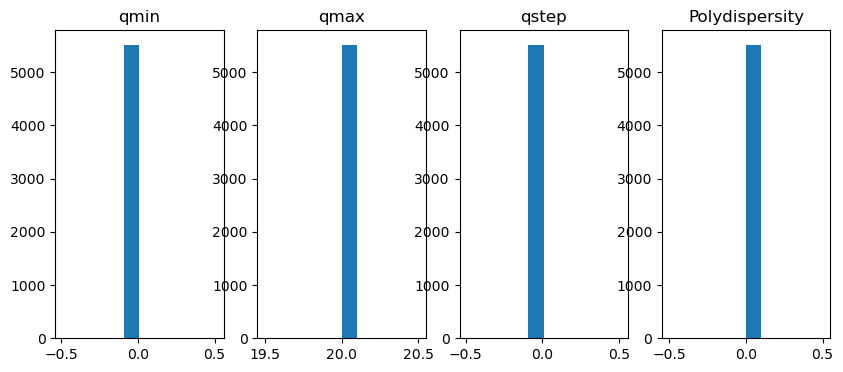

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(data["qmin"])
plt.title("qmin")
plt.subplot(1,4,2)
plt.hist(data["qmax"])
plt.title("qmax")
plt.subplot(1,4,3)
plt.hist(data["qstep"])
plt.title("qstep")
plt.subplot(1,4,4)
plt.hist(data["polydispersity"])
plt.title("Polydispersity")


Text(0.5, 1.0, 'Element')

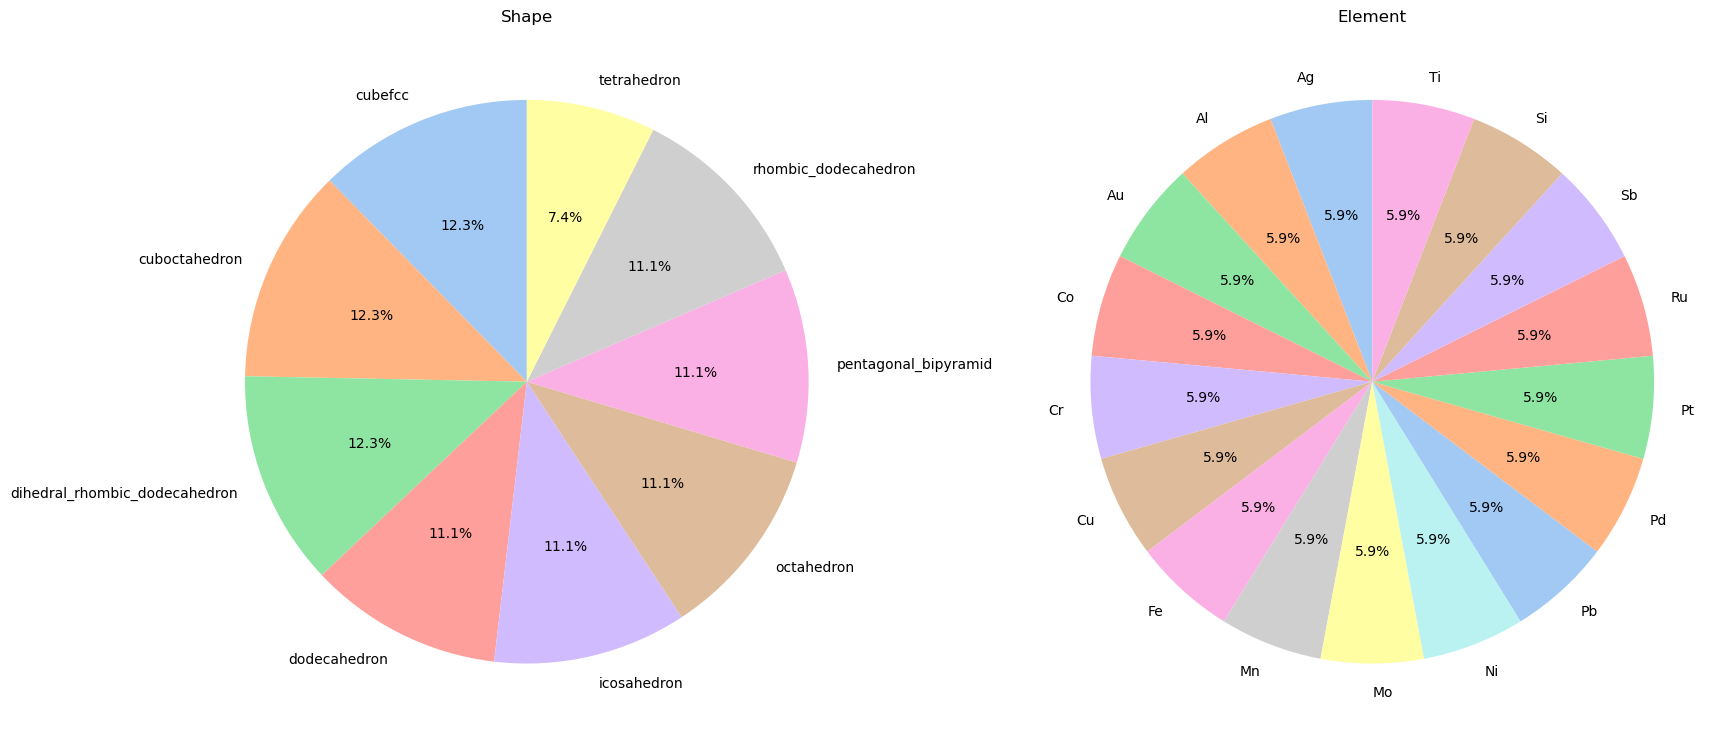

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pie(data['Shape'].value_counts(),labels=np.unique(data["Shape"]),autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Shape")
plt.subplot(1,2,2)
plt.pie(data['Element'].value_counts(),labels=np.unique(data["Element"]),autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Element")

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'cubefcc'),
  Text(1, 0, 'cuboctahedron'),
  Text(2, 0, 'dihedral_rhombic_dodecahedron'),
  Text(3, 0, 'dodecahedron'),
  Text(4, 0, 'icosahedron'),
  Text(5, 0, 'octahedron'),
  Text(6, 0, 'pentagonal_bipyramid'),
  Text(7, 0, 'rhombic_dodecahedron'),
  Text(8, 0, 'tetrahedron')])

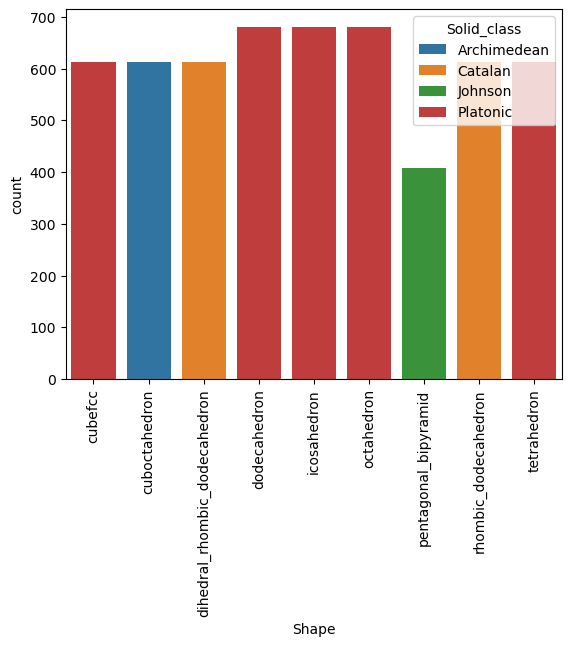

In [ ]:
#Relation entre Solid_class et Shape
sns.countplot(x=data["Shape"],hue=data["Solid_class"])
plt.xticks(rotation=90)

**==> Les Solid_class sont liés à des shape specifiques. Exemple les nanoparticules à shape pentagonal_bipyramid ont la solid class Johnson**

<Axes: xlabel='Element', ylabel='Solid_class'>

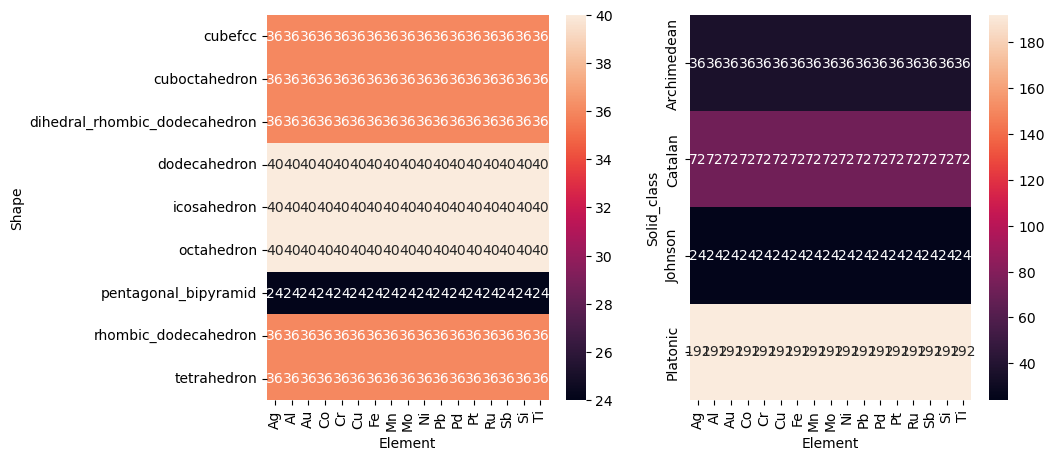

In [ ]:
plt.figure(figsize=(10,5))

#table de contigence Shape Element
plt.subplot(121)
contig=pd.crosstab(data["Shape"],data["Element"])
sns.heatmap(contig,fmt='d',annot=True)

#table de contigence Solid_class Element
plt.subplot(122)
contig=pd.crosstab(data["Solid_class"],data["Element"])
sns.heatmap(contig,fmt='d',annot=True)

**==> les elements peuvent avoir n'importe quelle Shape et Solid Classe**

# Exploration des données quantitatives

In [ ]:
data_num=data.drop(["Solid_class","Shape","Element","polydispersity","qstep","qmax","qmin","q","Intensities"],axis=1)
data_num.head()

,Distance,Eq_Radius,n_Atoms,b_iso,Size_parameters_1,Size_parameters_2,Size_parameters_3
0,2.888885,7.076294,63,0.1,2.0,0.0,0.0
1,2.888885,7.076294,63,0.3,2.0,0.0,0.0
2,2.888885,7.076294,63,0.5,2.0,0.0,0.0
3,2.888885,7.076294,63,0.9,2.0,0.0,0.0
4,2.852398,6.986920,63,0.1,2.0,0.0,0.0


Text(0.5, 1.0, 'b_iso')

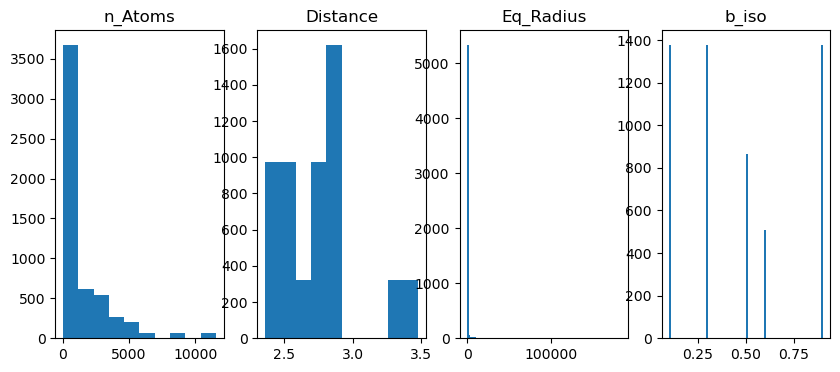

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(data["n_Atoms"])
plt.title("n_Atoms")
plt.subplot(1,4,2)
plt.hist(data["Distance"])
plt.title("Distance")
plt.subplot(1,4,3)
plt.hist(data["Eq_Radius"], bins=100)
plt.title("Eq_Radius")
plt.subplot(1,4,4)
plt.hist(data["b_iso"], bins=100)
plt.title("b_iso")

/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'log_b_iso')

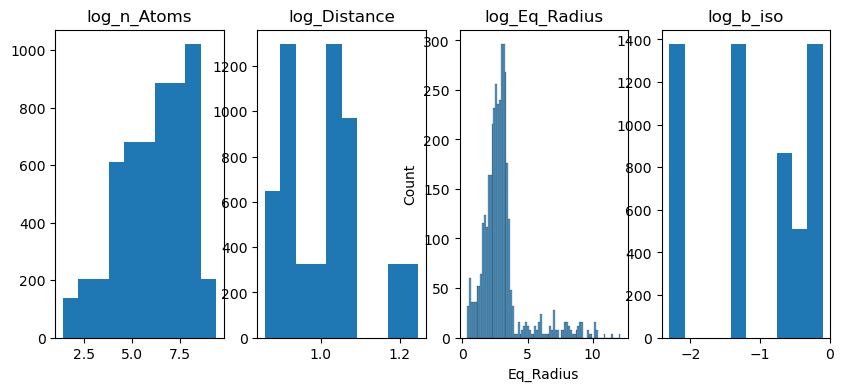

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(np.log(data["n_Atoms"]))
plt.title("log_n_Atoms")
plt.subplot(1,4,2)
plt.hist(np.log(data["Distance"]))
plt.title("log_Distance")
plt.subplot(1,4,3)
sns.histplot(np.log(data["Eq_Radius"]))
plt.title("log_Eq_Radius")
plt.subplot(1,4,4)
plt.hist(np.log(data["b_iso"]))
plt.title("log_b_iso")

/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

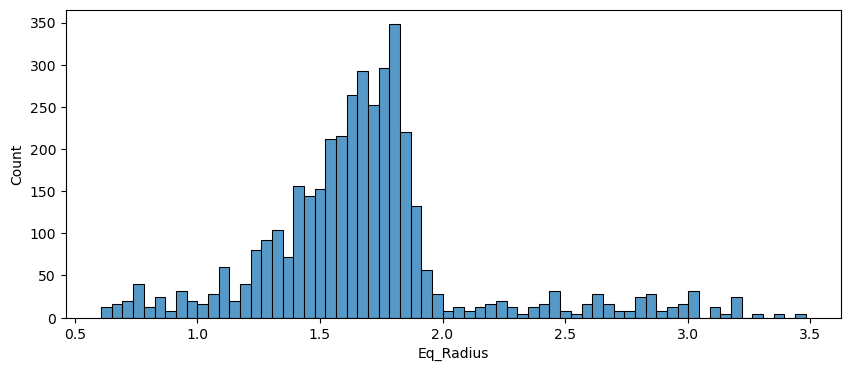

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(np.sqrt(np.log(data["Eq_Radius"])))
plt.plot

Text(0.5, 1.0, 'sqrt_Size_parameters_3')

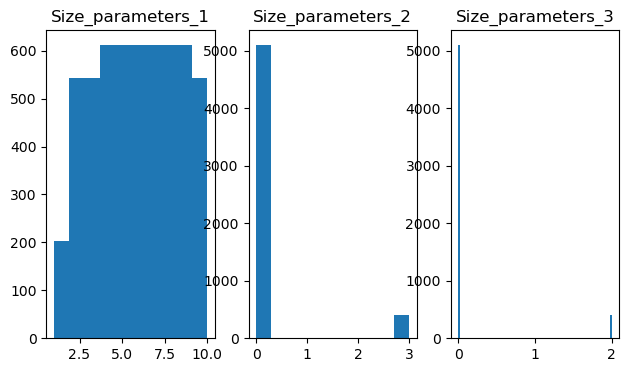

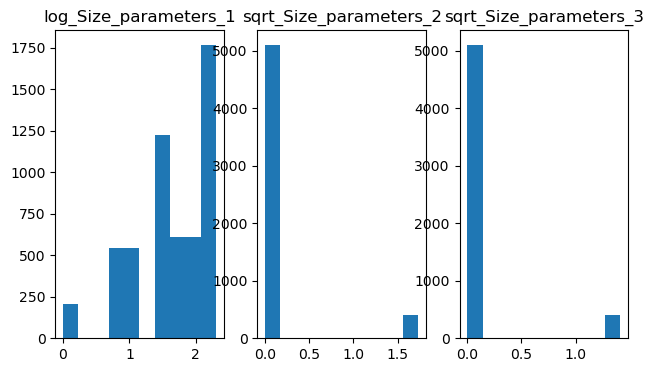

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(data_num["Size_parameters_1"])
plt.title("Size_parameters_1")
plt.subplot(1,4,2)
plt.hist(data_num["Size_parameters_2"])
plt.title("Size_parameters_2")
plt.subplot(1,4,3)
plt.hist(data_num["Size_parameters_3"], bins=100)
plt.title("Size_parameters_3")

plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(np.log(data_num["Size_parameters_1"]))
plt.title("log_Size_parameters_1")
plt.subplot(1,4,2)
plt.hist((data_num["Size_parameters_2"])**0.5)
plt.title("sqrt_Size_parameters_2")
plt.subplot(1,4,3)
plt.hist((data_num["Size_parameters_3"])**0.5)
plt.title("sqrt_Size_parameters_3")


## Transformation des données

In [ ]:
data_num["log_n_Atoms"]=np.log(data["n_Atoms"])
data_num.drop(["n_Atoms"],axis=1,inplace=True)
data_num.head()

,Distance,Eq_Radius,b_iso,Size_parameters_1,Size_parameters_2,Size_parameters_3,log_n_Atoms
0,2.888885,7.076294,0.1,2.0,0.0,0.0,4.143135
1,2.888885,7.076294,0.3,2.0,0.0,0.0,4.143135
2,2.888885,7.076294,0.5,2.0,0.0,0.0,4.143135
3,2.888885,7.076294,0.9,2.0,0.0,0.0,4.143135
4,2.852398,6.986920,0.1,2.0,0.0,0.0,4.143135


# Analyse Bidimentionnelle: Matrice des correlations

<Axes: >

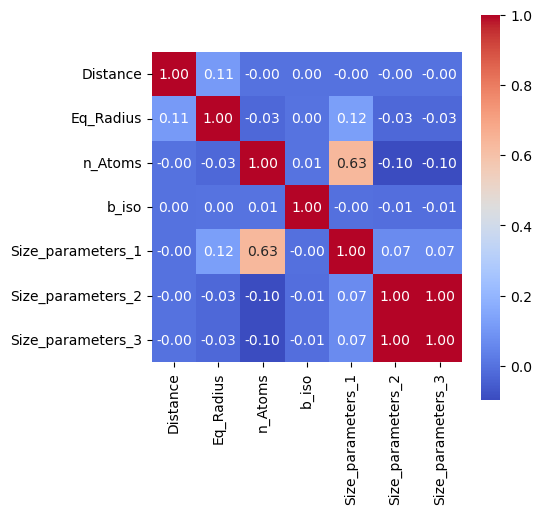

In [ ]:
corr_matrix = data_num.corr()

# Générer la heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# PCA sur data_num

Variance expliquée par chaque composante: [0.28853016 0.23415829 0.15894473 0.14283943 0.12822484 0.04730255
 0.        ]
Variance expliquée totale: 1.0


Text(0, 0.5, 'explained_variance_ratio')

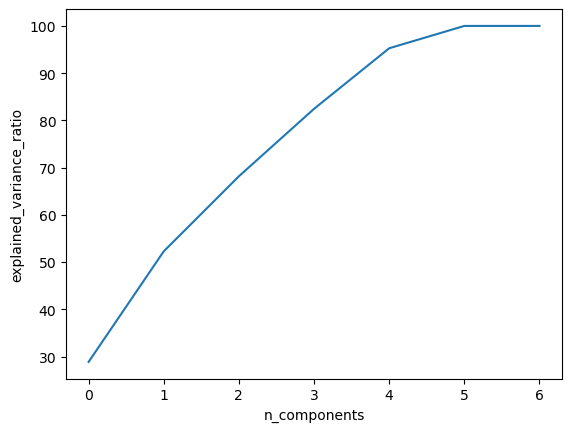

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

# Étape 2 : Appliquer PCA
pca = PCA()  # Remplace 2 par le nombre de composantes souhaité
data_pca = pca.fit_transform(data_scaled)

# Afficher la variance expliquée par chaque composante
print(f'Variance expliquée par chaque composante: {pca.explained_variance_ratio_}')
print(f'Variance expliquée totale: {sum(pca.explained_variance_ratio_)}')

plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("n_components")
plt.ylabel("explained_variance_ratio")


## Cercle des correlations

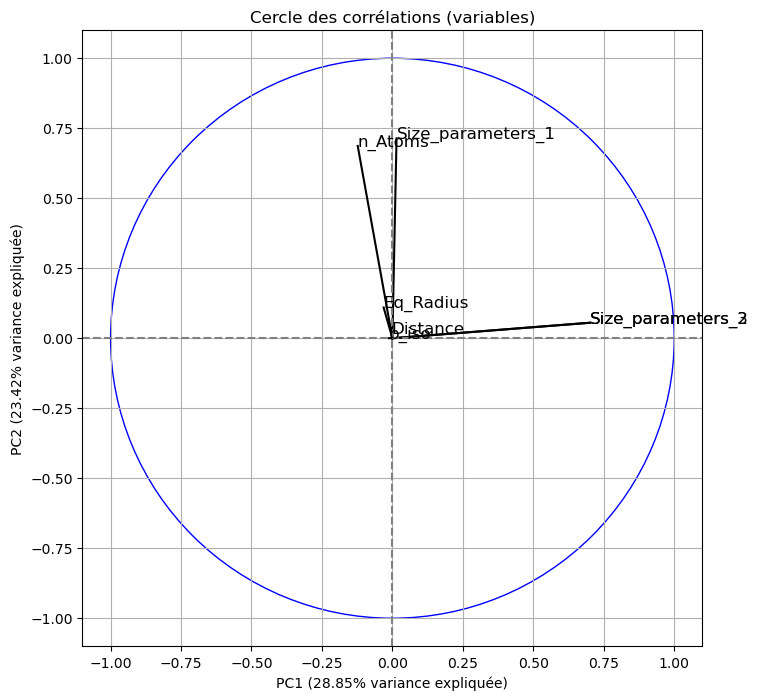

In [ ]:
pcs = pca.components_

plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_num.columns[i], fontsize=12)

# Ajouter le cercle des corrélations
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Centrer les axes sur (0,0) avec des limites symétriques entre -1 et 1
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter les lignes pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.title('Cercle des corrélations (variables)')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

plt.grid(True)
plt.show()

**LA PC1==> Size_par2**
**LA PC2==> Size_par1 + log_n_atoms (qui sont fortement correlés)**

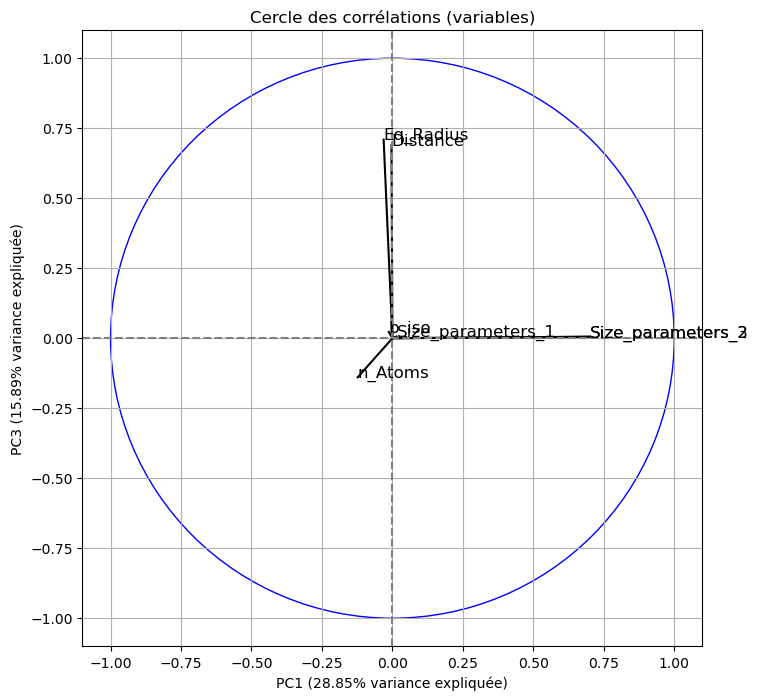

In [ ]:
plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[2, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_num.columns[i], fontsize=12)

# Ajouter le cercle des corrélations
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Centrer les axes sur (0,0) avec des limites symétriques entre -1 et 1
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter les lignes pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.title('Cercle des corrélations (variables)')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% variance expliquée)")

plt.grid(True)
plt.show()

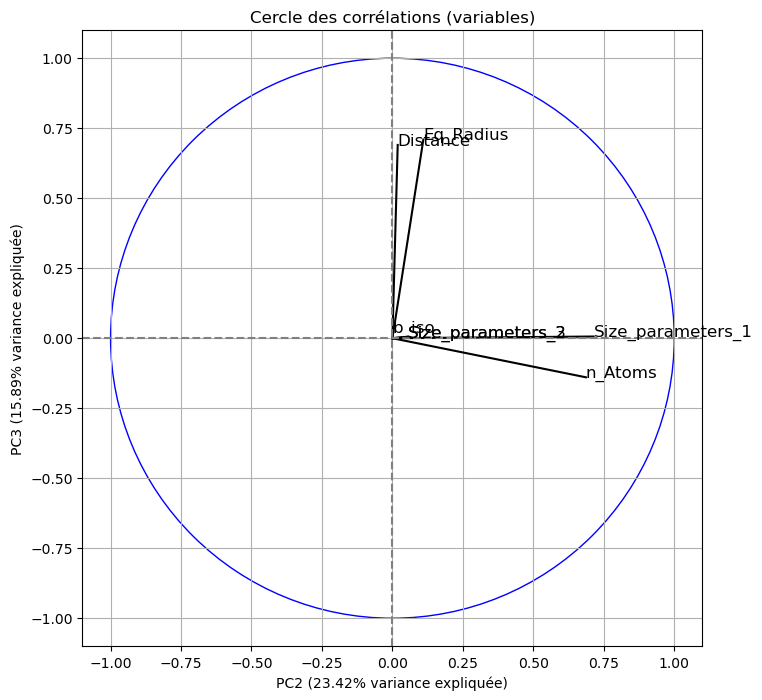

In [ ]:
plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[1, :], pcs[2, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_num.columns[i], fontsize=12)

# Ajouter le cercle des corrélations
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Centrer les axes sur (0,0) avec des limites symétriques entre -1 et 1
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter les lignes pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.title('Cercle des corrélations (variables)')
plt.xlabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% variance expliquée)")

plt.grid(True)
plt.show()

Donc : \
PC1 --> Size_parameters_2 et 3\
PC2 --> Size_parameters_1 et n_Atoms\
PC3 --> Distance et Eq_radius

## Graph des individus avec habillage= Solid_class

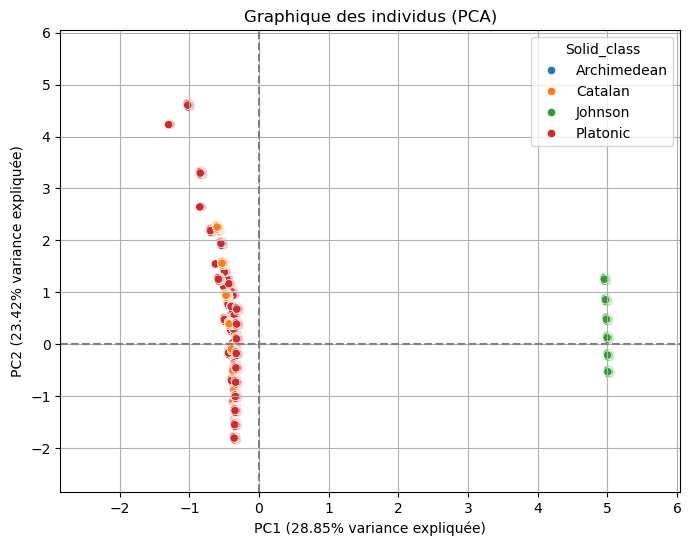

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data["Solid_class"])

#sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1])  # Si labels présents

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

**La positions des particules à solidclass=Johnson et l'analyse sur le cercle des correlations montrent qu'ils'ont une siz_param2 plus important , n_atoms et size_param1  faibleS par rapport aux autres. COnfirmation avec les 3 figures ci dessous**

Text(0, 0.5, 'n_Atoms')

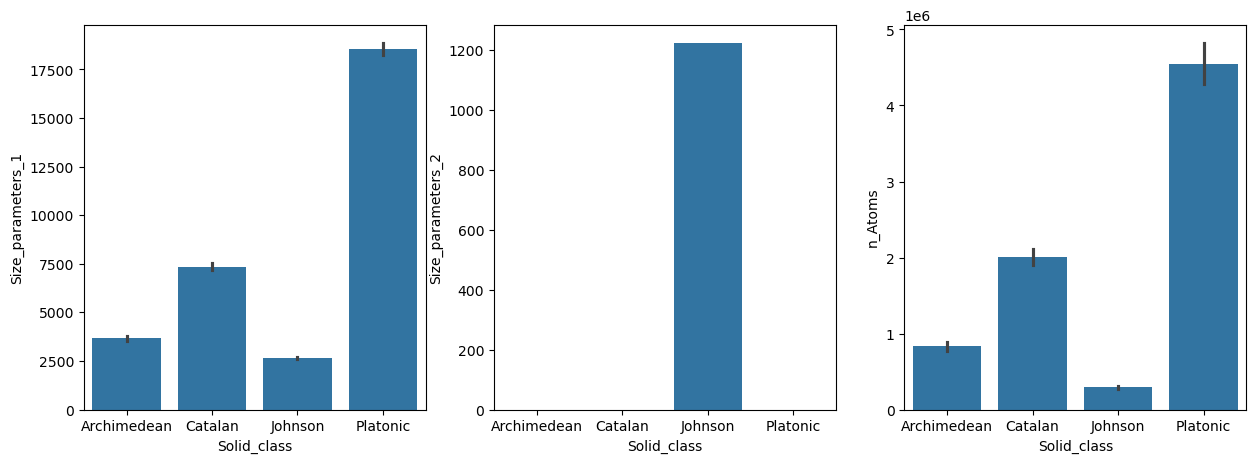

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.barplot(x=data["Solid_class"],y=data["Size_parameters_1"],estimator=np.sum)
plt.xlabel("Solid_class")
plt.ylabel("Size_parameters_1")
plt.subplot(132)
sns.barplot(x=data["Solid_class"],y=data["Size_parameters_2"],estimator=np.sum)
plt.xlabel("Solid_class")
plt.ylabel("Size_parameters_2")
plt.subplot(133)
sns.barplot(x=data["Solid_class"],y=data["n_Atoms"],estimator=np.sum)
plt.xlabel("Solid_class")
plt.ylabel("n_Atoms")

## Graph des individus avec habillage= Shape

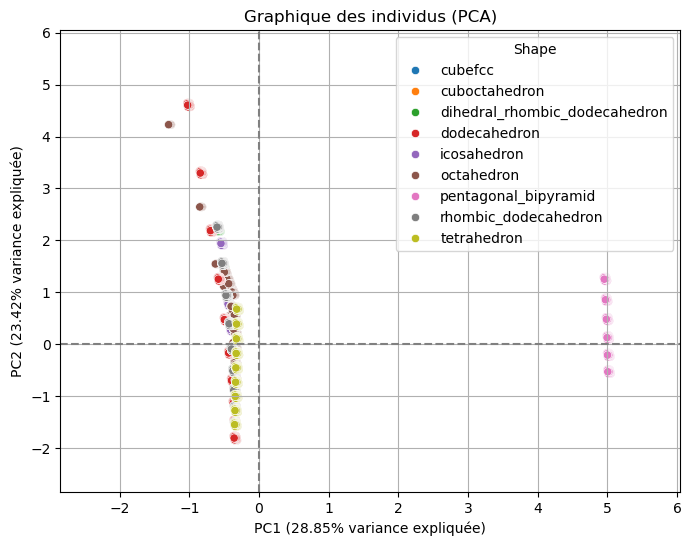

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data["Shape"])

#sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1])  # Si labels présents

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

**La positions des particules à Shape=Pentagonal_bipyramid et l'nalyse precedente montrent qu'ils'ont une siz_param2 plus important , n_atoms et size_param1  faibleS par rapport aux autres. COnfirmation avec les 3 figures ci dessous. Ils correspondent aux nanoparticules à solidClass=Johnson**



Text(0, 0.5, 'n_Atoms')

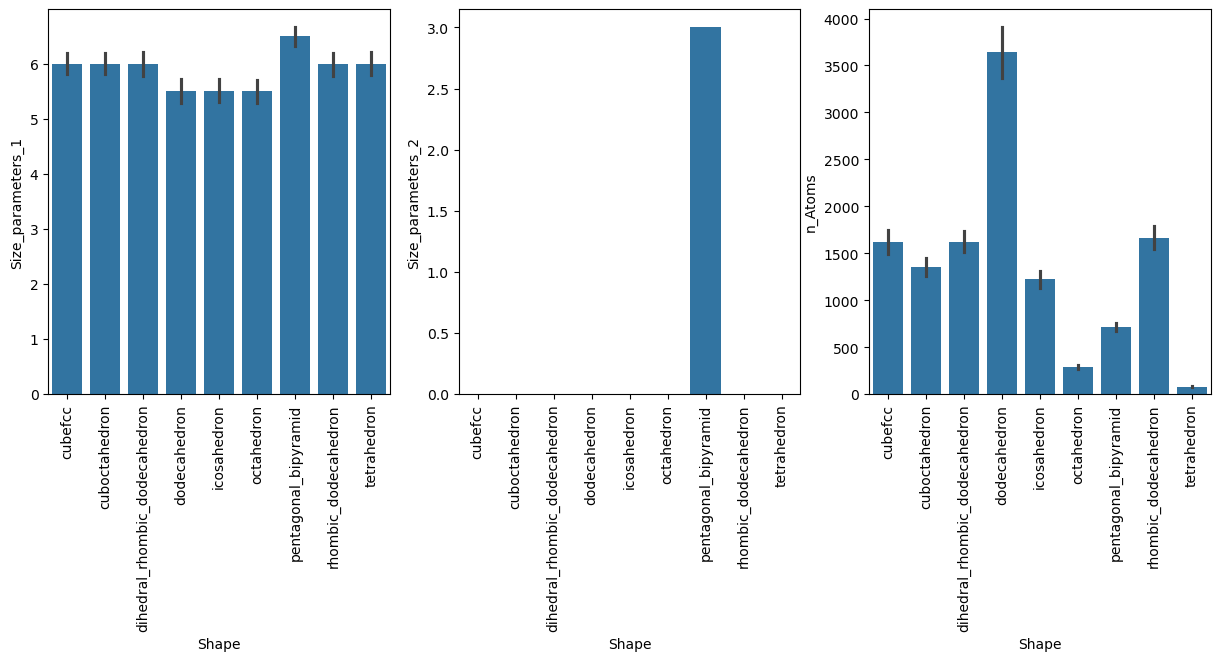

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.barplot(x=data["Shape"],y=data["Size_parameters_1"],estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel("Shape")
plt.ylabel("Size_parameters_1")

plt.subplot(132)
sns.barplot(x=data["Shape"],y=data["Size_parameters_2"],estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel("Shape")
plt.ylabel("Size_parameters_2")

plt.subplot(133)
sns.barplot(x=data["Shape"],y=data["n_Atoms"],estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel("Shape")
plt.ylabel("n_Atoms")

# Création d'un dataset avec uniquement les intensités

In [8]:
intensities = data.Intensities
intensities_np = np.vstack(intensities.values)
intensities_df = pd.DataFrame(intensities_np)
intensities_df

,0,1,2,3,4,5,6,7,8,9,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
0,8.760072e+06,8.737556e+06,8.700139e+06,8647997.0,8.581356e+06,8.500521e+06,8.405848e+06,8297766.00,8176743.5,8.043316e+06,...,5504.801270,5504.597168,5503.507324,5501.530273,5498.683105,5494.964844,5490.397949,5484.985840,5478.751953,5471.714355
1,8.760070e+06,8.737548e+06,8.700119e+06,8647962.0,8.581303e+06,8.500444e+06,8.405745e+06,8297633.00,8176578.0,8.043116e+06,...,5267.766602,5263.145020,5258.204102,5252.941895,5247.367188,5241.477539,5235.287109,5228.791504,5222.004395,5214.934082
2,8.760067e+06,8.737539e+06,8.700101e+06,8647928.0,8.581249e+06,8.500368e+06,8.405643e+06,8297501.00,8176413.5,8.042916e+06,...,5180.836426,5174.684570,5168.423340,5162.050293,5155.571289,5148.981934,5142.292969,5135.496582,5128.603027,5121.615234
3,8.760063e+06,8.737522e+06,8.700062e+06,8647859.0,8.581142e+06,8.500216e+06,8.405438e+06,8297237.00,8176083.5,8.042516e+06,...,5137.264160,5130.401855,5123.537109,5116.666504,5109.794434,5102.915527,5096.037598,5089.151367,5082.264160,5075.376465
4,6.700418e+05,6.683341e+05,6.654966e+05,661542.0,6.564878e+05,6.503571e+05,6.431766e+05,634978.75,625799.0,6.156782e+05,...,124.255180,124.792656,125.320938,125.838524,126.344070,126.835983,127.313080,127.774475,128.219193,128.646286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,9.469251e+06,9.422357e+06,9.344688e+06,9236972.0,9.100207e+06,8.935659e+06,8.744831e+06,8529454.00,8291451.5,8.032926e+06,...,505.604095,505.211121,504.831116,504.460999,504.103180,503.755035,503.416077,503.086365,502.765472,502.451233
5504,2.336461e+07,2.319472e+07,2.291418e+07,22526814.0,2.203790e+07,2.145398e+07,2.078283e+07,20033198.00,19214700.0,1.833759e+07,...,2605.535156,2589.801270,2575.012451,2561.586426,2549.911133,2540.307861,2533.056641,2528.360107,2526.379639,2527.180420
5505,2.336460e+07,2.319470e+07,2.291413e+07,22526724.0,2.203776e+07,2.145378e+07,2.078257e+07,20032874.00,19214306.0,1.833713e+07,...,2546.387207,2538.134766,2530.240234,2522.856689,2516.123535,2510.155273,2505.053711,2500.886230,2497.714111,2495.553223
5506,2.336459e+07,2.319468e+07,2.291408e+07,22526632.0,2.203762e+07,2.145359e+07,2.078231e+07,20032550.00,19213914.0,1.833667e+07,...,2524.695312,2519.205566,2513.853516,2508.696045,2503.782227,2499.152832,2494.845947,2490.881348,2487.285889,2484.059082


In [9]:
intensities_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
count,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,...,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03,5.508000e+03
mean,1.178510e+10,1.111519e+10,1.008568e+10,8.809469e+09,7.414240e+09,6.021437e+09,4.729419e+09,3.603770e+09,2.675560e+09,1.946202e+09,...,1.282724e+05,1.281593e+05,1.278266e+05,1.272725e+05,1.265162e+05,1.255968e+05,1.245682e+05,1.234927e+05,1.224393e+05,1.214789e+05
std,5.170697e+10,4.751019e+10,4.126468e+10,3.389585e+10,2.636439e+10,1.946955e+10,1.372187e+10,9.315210e+09,6.180497e+09,4.083782e+09,...,3.506717e+05,3.516184e+05,3.515322e+05,3.501128e+05,3.473349e+05,3.434394e+05,3.388500e+05,3.340614e+05,3.295275e+05,3.255942e+05
min,2.703058e+03,2.702033e+03,2.700327e+03,2.697941e+03,2.694875e+03,2.691133e+03,2.686717e+03,2.681630e+03,2.675874e+03,2.669456e+03,...,8.020738e+00,8.014660e+00,8.008589e+00,8.002529e+00,7.996479e+00,7.990436e+00,7.984404e+00,7.978378e+00,7.972362e+00,7.966354e+00
25%,1.884965e+07,1.880821e+07,1.873934e+07,1.864327e+07,1.852037e+07,1.819329e+07,1.782383e+07,1.765427e+07,1.728315e+07,1.687336e+07,...,3.375549e+03,3.371134e+03,3.381430e+03,3.366419e+03,3.346160e+03,3.344850e+03,3.366921e+03,3.363734e+03,3.357413e+03,3.354775e+03
50%,3.516981e+08,3.483658e+08,3.428755e+08,3.344849e+08,3.250970e+08,3.139379e+08,3.011616e+08,2.870356e+08,2.633629e+08,2.386029e+08,...,1.811667e+04,1.812845e+04,1.819807e+04,1.818493e+04,1.808590e+04,1.802396e+04,1.796721e+04,1.798267e+04,1.817225e+04,1.816868e+04
75%,4.395840e+09,4.307805e+09,4.171580e+09,3.994477e+09,3.776442e+09,3.457733e+09,3.074675e+09,2.737245e+09,2.386875e+09,1.939923e+09,...,8.272385e+04,8.325846e+04,8.339749e+04,8.471039e+04,8.418908e+04,8.548894e+04,8.544762e+04,8.410533e+04,8.367578e+04,8.330004e+04
max,8.645015e+11,7.645834e+11,6.475733e+11,5.305911e+11,4.119535e+11,2.980664e+11,1.985599e+11,1.194247e+11,6.267702e+10,3.326309e+10,...,4.593990e+06,4.578314e+06,4.543863e+06,4.494718e+06,4.439596e+06,4.386294e+06,4.337138e+06,4.288309e+06,4.233648e+06,4.170356e+06


# PCA sur les données d'intensités

Variance expliquée par chaque composante: [7.9976380e-01 4.0372819e-02 3.4222975e-02 ... 2.5320626e-16 2.0455451e-16
 2.3646594e-17]
Variance expliquée totale: 1.0000001459476333


Text(0, 0.5, 'explained_variance_ratio')

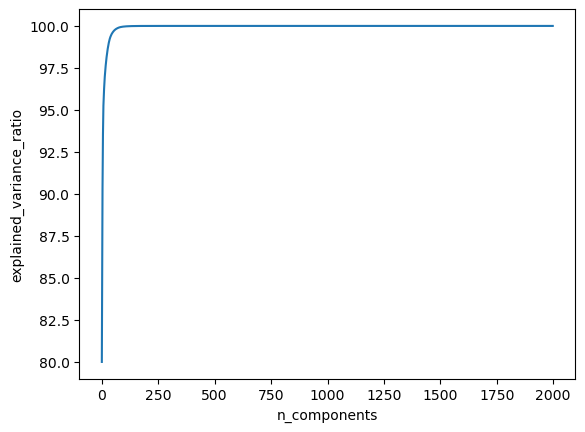

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(intensities_df)

# Étape 2 : Appliquer PCA
pca = PCA()  # Remplace 2 par le nombre de composantes souhaité
data_pca = pca.fit_transform(data_scaled)

# Afficher la variance expliquée par chaque composante
print(f'Variance expliquée par chaque composante: {pca.explained_variance_ratio_}')
print(f'Variance expliquée totale: {sum(pca.explained_variance_ratio_)}')

plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("n_components")
plt.ylabel("explained_variance_ratio")

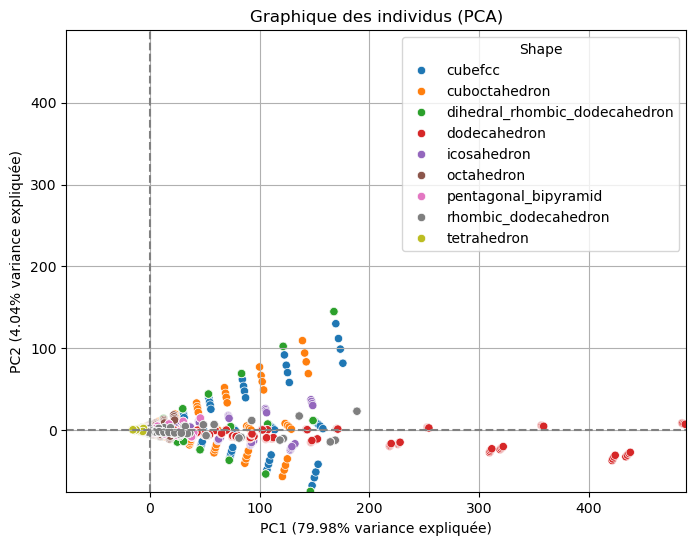

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data.loc[:len(intensities_df)-1,"Shape"])

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

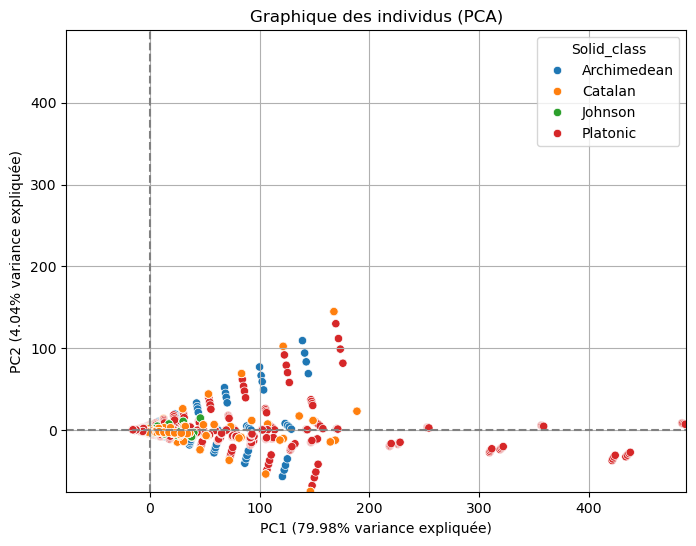

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data.loc[:len(intensities_df)-1,"Solid_class"])

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

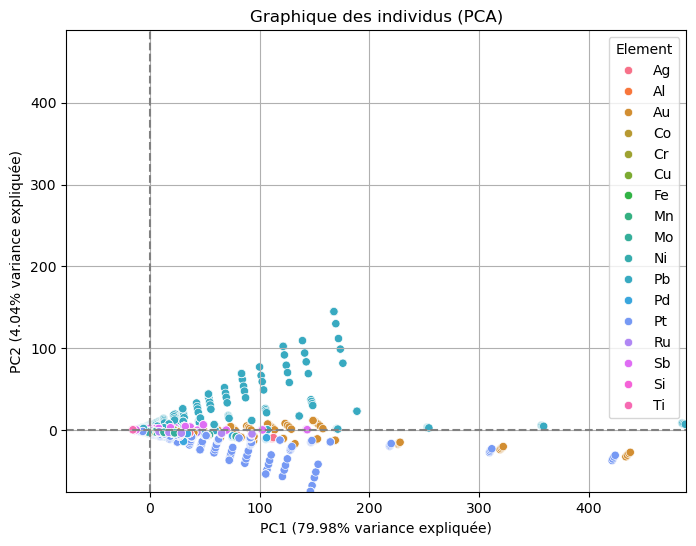

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data.loc[:len(intensities_df)-1,"Element"])

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

In [ ]:
data["n_Atoms"] = data["n_Atoms"].astype('category')
data["n_Atoms"]

0        63
1        63
2        63
3        63
4        63
       ... 
5503    220
5504    220
5505    220
5506    220
5507    220
Name: n_Atoms, Length: 5508, dtype: category
Categories (67, Int64): [4, 6, 10, 13, ..., 4785, 6137, 8569, 11571]

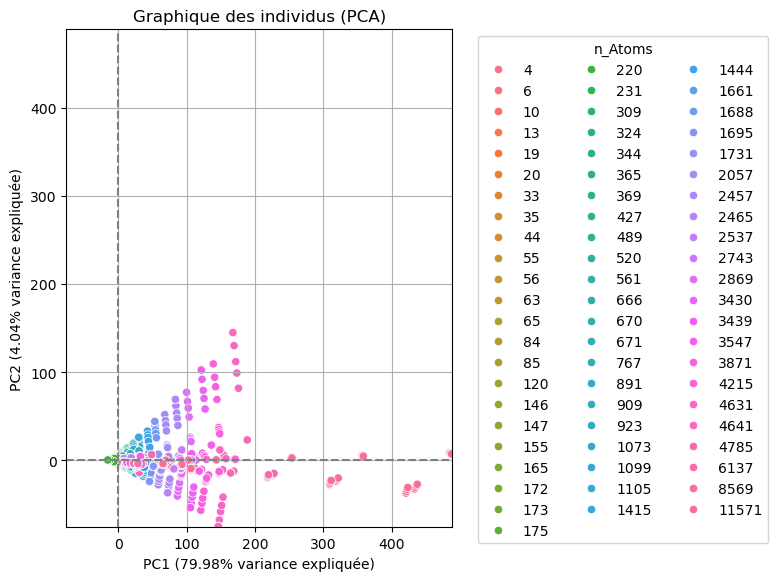

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data.loc[:len(data)-1,"n_Atoms"])

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.legend(title="n_Atoms",bbox_to_anchor=(1.05, 1), loc='upper left', ncols=3)
plt.grid(True)
plt.tight_layout()
plt.show()

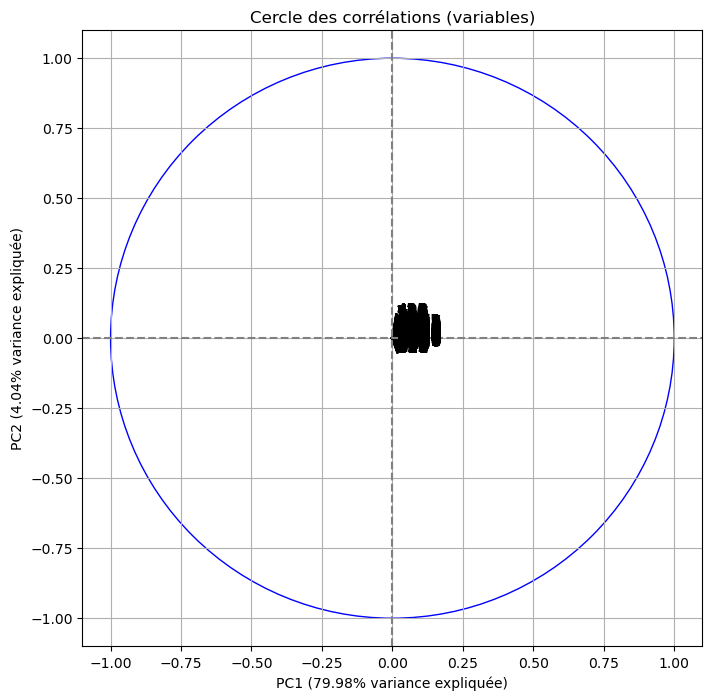

In [ ]:
pcs = pca.components_

plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, intensities_df.columns[i], fontsize=12)

# Ajouter le cercle des corrélations
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Centrer les axes sur (0,0) avec des limites symétriques entre -1 et 1
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter les lignes pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.title('Cercle des corrélations (variables)')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

plt.grid(True)
plt.show()

# Clustering

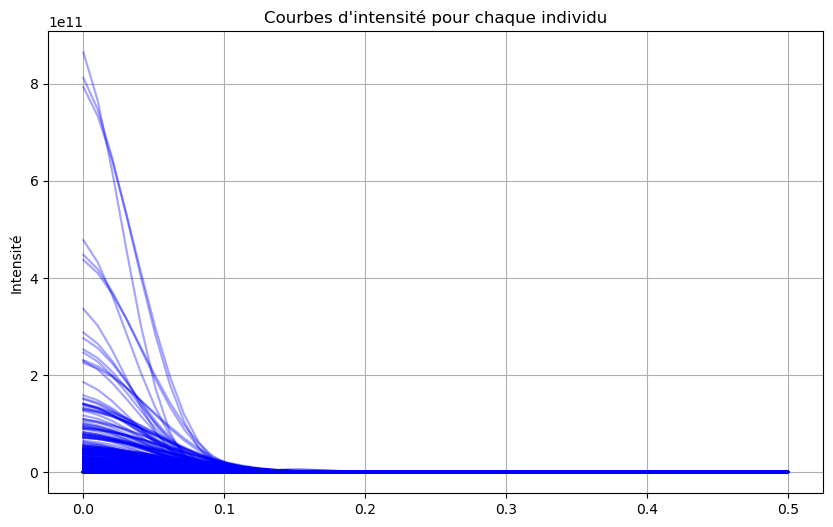

In [ ]:
intensities_T= intensities_df.T
x = np.linspace(0,0.5,50)
plt.figure(figsize=(10, 6))

for i in range(intensities_T.shape[1]):
    plt.plot(x, intensities_T.iloc[0:50,i], alpha=0.1, color='blue')

plt.title("Courbes d'intensité pour chaque individu")
plt.ylabel("Intensité")
plt.grid(True)
plt.show()
# tester en log log

In [ ]:
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 3 The average silhouette_score is : 0.8394539
For n_clusters = 4 The average silhouette_score is : 0.7256842
For n_clusters = 5 The average silhouette_score is : 0.7049428
For n_clusters = 6 The average silhouette_score is : 0.7049337
For n_clusters = 7 The average silhouette_score is : 0.7084124
For n_clusters = 8 The average silhouette_score is : 0.6822231
For n_clusters = 9 The average silhouette_score is : 0.68097275
For n_clusters = 10 The average silhouette_score is : 0.6679982


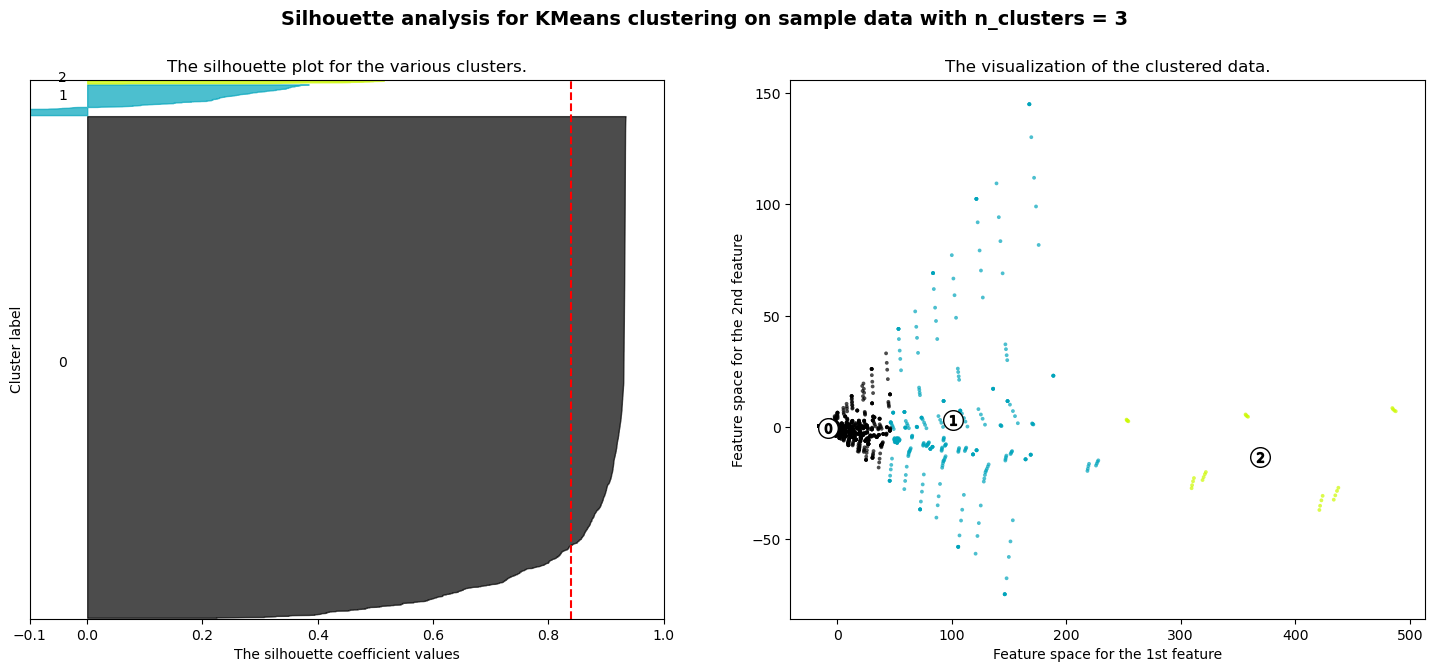

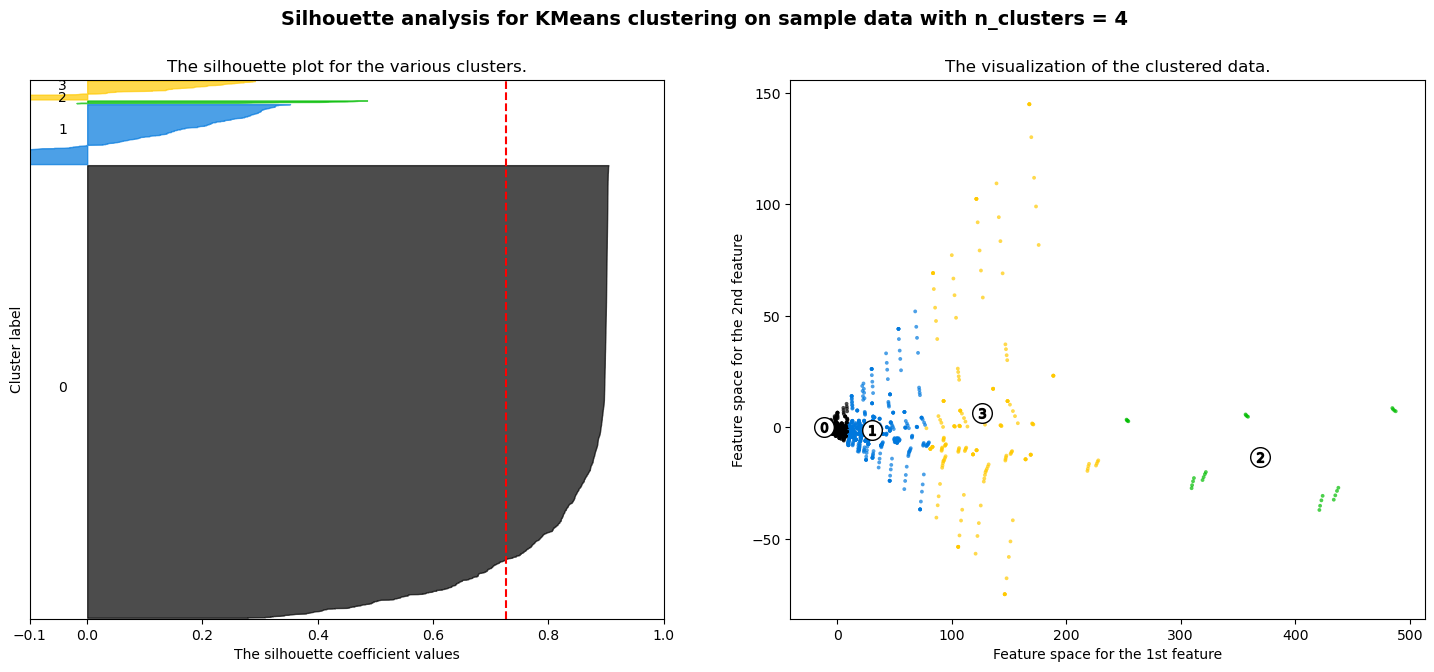

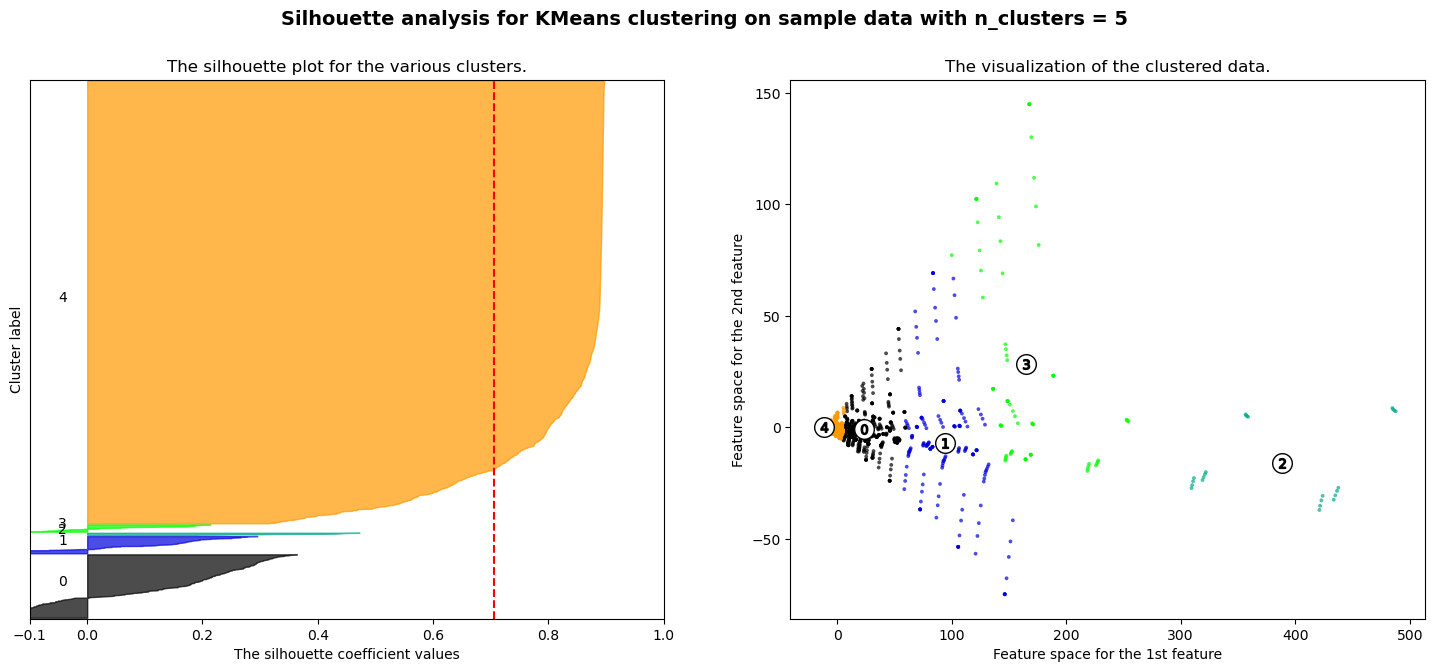

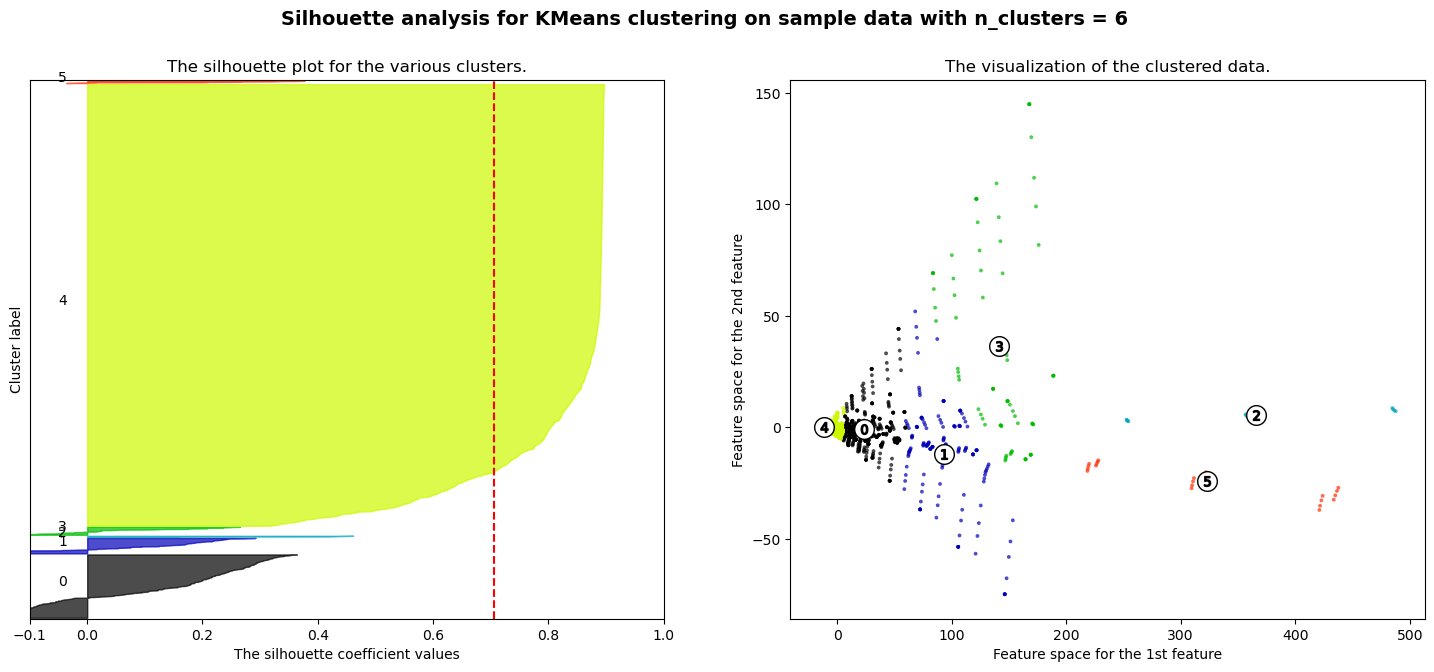

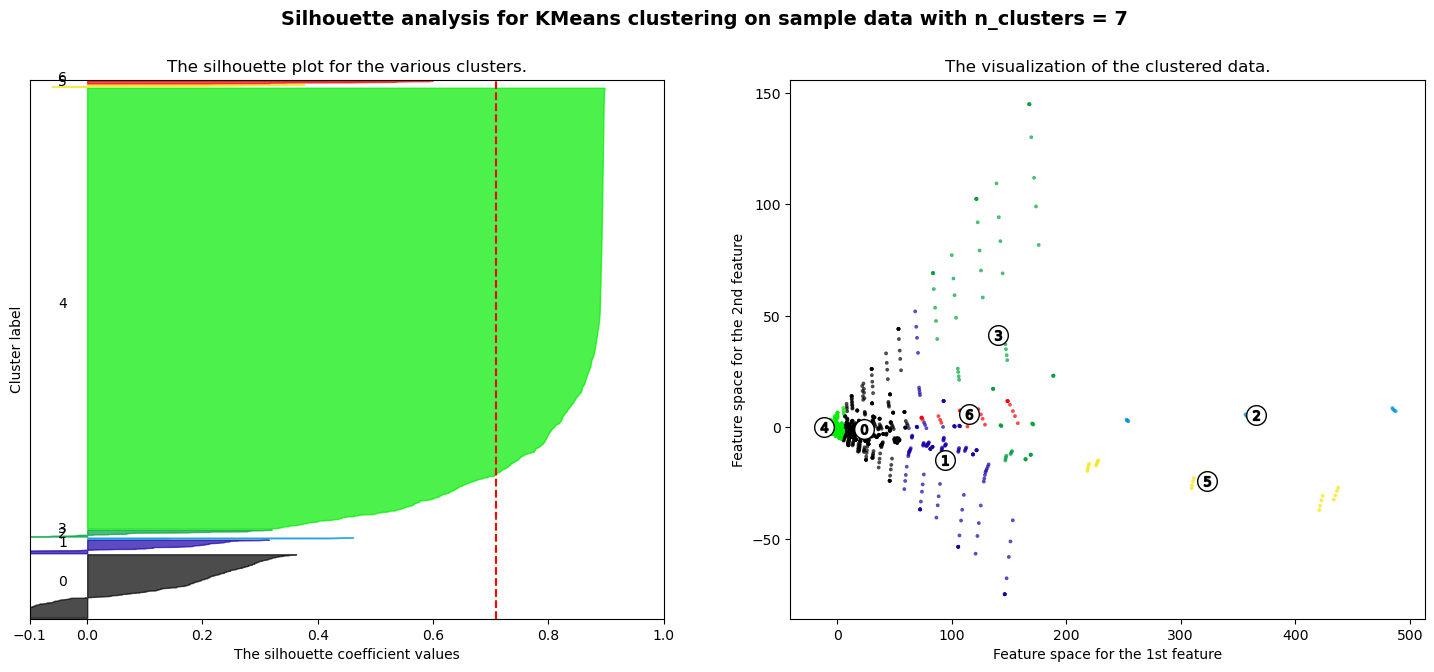

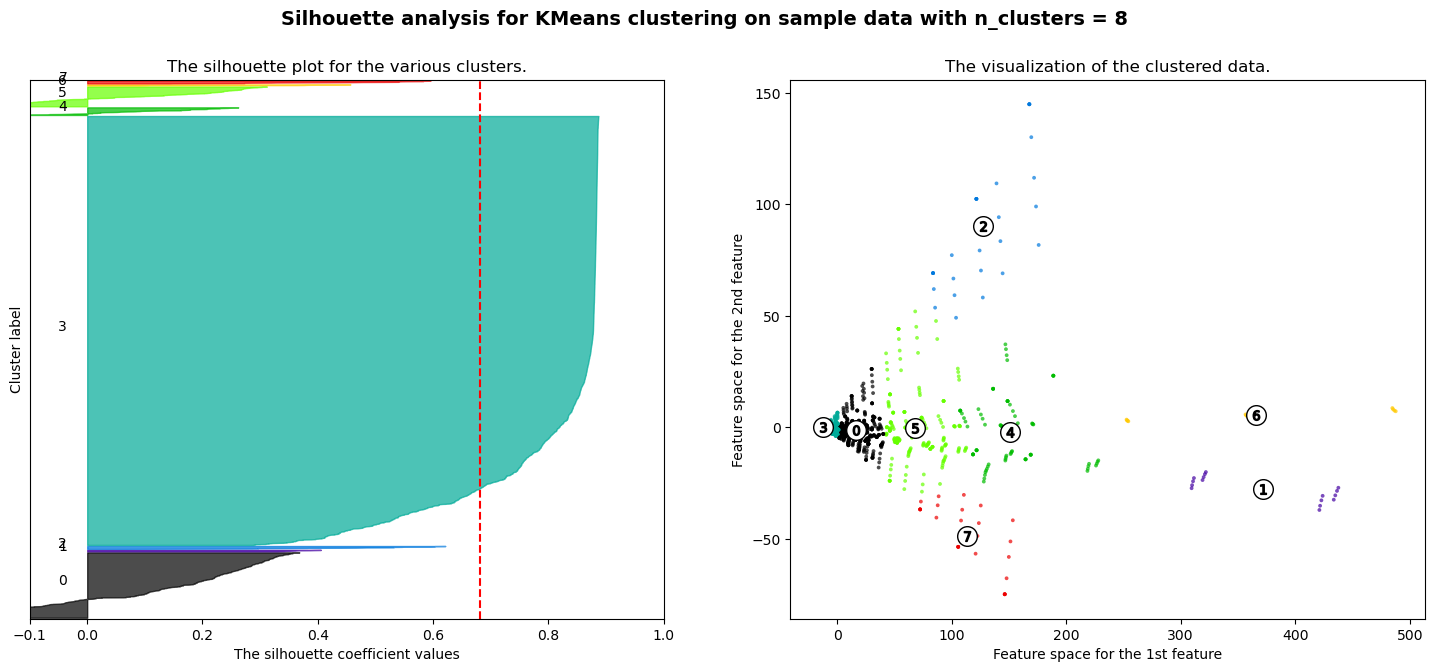

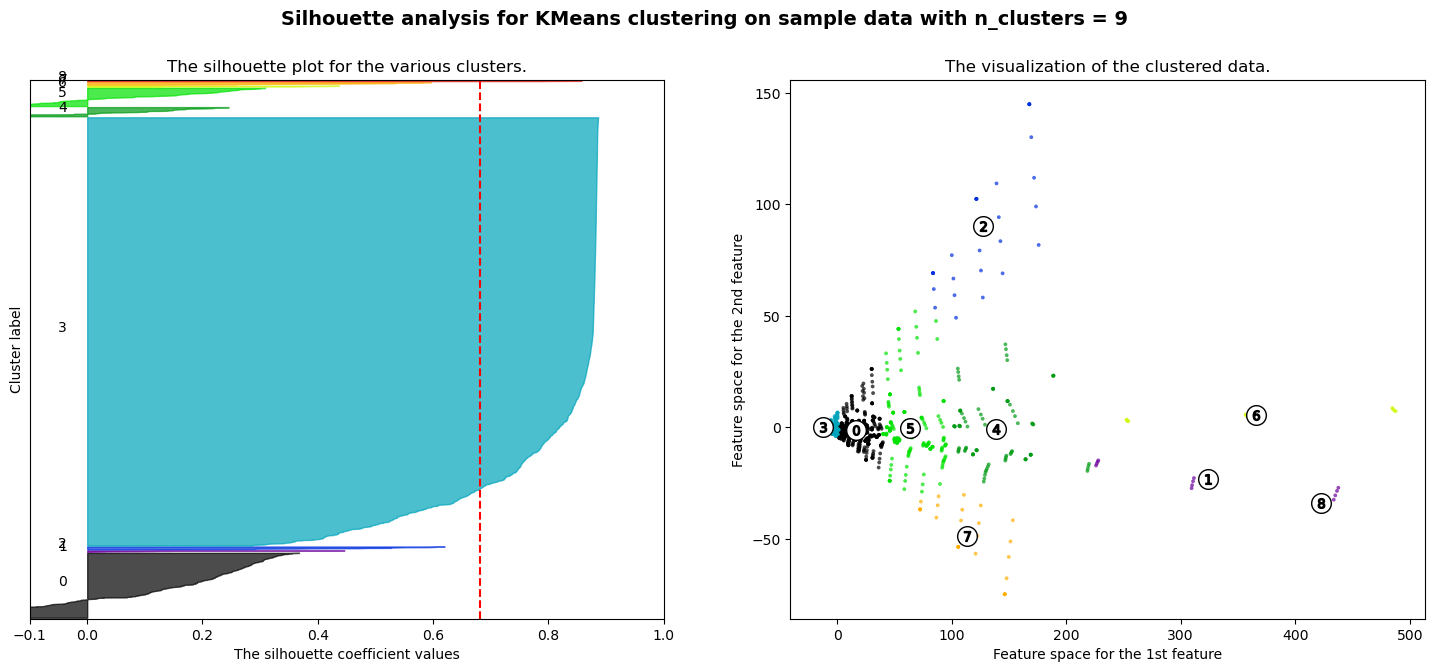

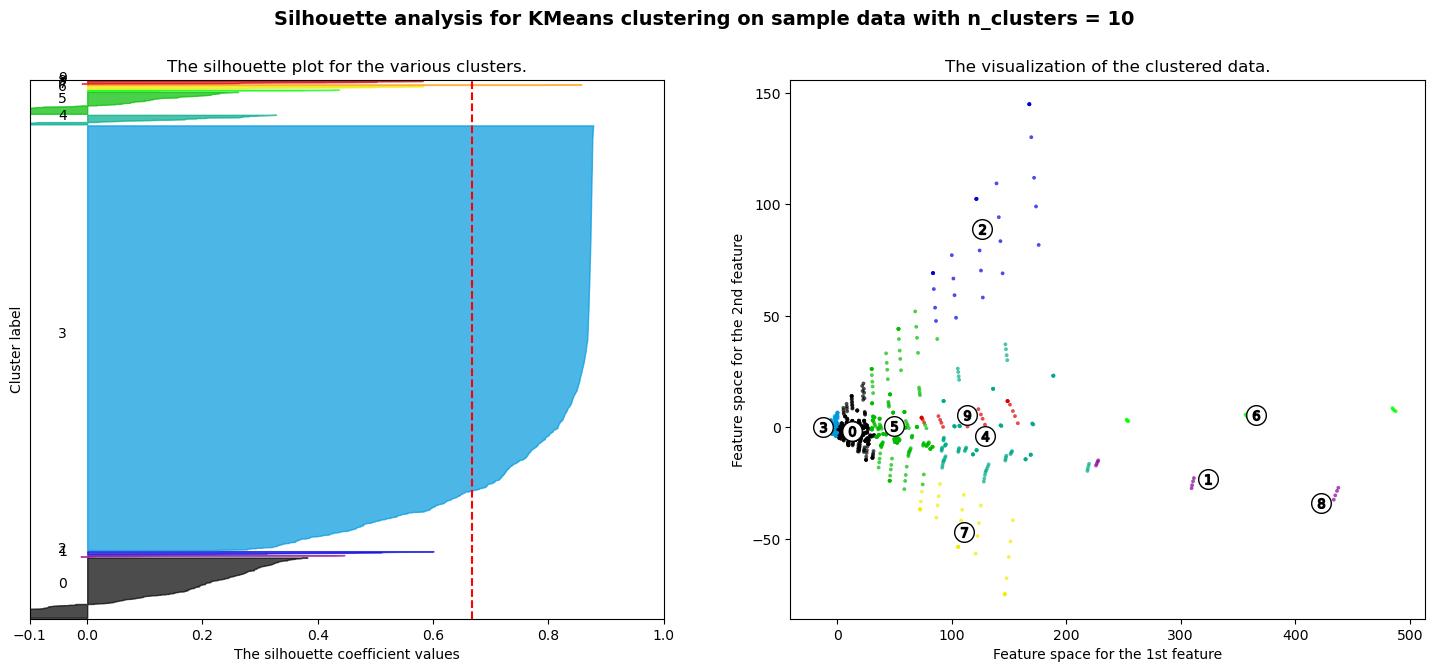

In [ ]:
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_pca[:, 0], data_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Standardiser les données pour DTW
df_scaled = TimeSeriesScalerMeanVariance().fit_transform(intensities_df.values.reshape(intensities_df.shape[0], intensities_df.shape[1], 1))

# Appliquer KMeans avec DTW comme mesure de distance
model = TimeSeriesKMeans(n_clusters=3, metric="dtw")
clusters = model.fit_predict(df_scaled)


##### hyper long j'ai arreté avant la fin

# Régression linéaire pour prédire la taille (n_Atoms, size_parameter_1 et eq_radius)

In [11]:
data_num=data.drop(["Solid_class","Shape","Element","polydispersity","qstep","qmax","qmin","q","Intensities"],axis=1)

# Avant transformation
print("Valeurs minimales de Eq_Radius :", data_num["Eq_Radius"].min())

# Après np.log
#log_values = np.log(data_num["Eq_Radius"])

# Filtrer les valeurs strictement positives avant np.log
#filtered_values = data_num["Eq_Radius"][data_num["Eq_Radius"] > 0]
#log_values = np.log(filtered_values)

# Appliquer np.log seulement aux valeurs positives
data_num["Log_Eq_Radius"] = np.where(
    data_num["Eq_Radius"] > 0,  # Condition
    np.log(data_num["Eq_Radius"]),  # Si la condition est vraie
    data_num["Eq_Radius"]  # Si la condition est fausse
)

print("Valeurs minimales après log :", data_num["Log_Eq_Radius"].min())

# Après np.sqrt
sqrt_log_values = np.sqrt(data_num["Log_Eq_Radius"])
print("Y a-t-il des NaN ?", np.isnan(sqrt_log_values).any())

Valeurs minimales de Eq_Radius : 0.0
Valeurs minimales après log : 0.0
Y a-t-il des NaN ? False


/opt/anaconda3/envs/RI_project/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
data_num["log_n_Atoms"]=np.log(data["n_Atoms"])
data_num["sqrt_log_eq_radius"] = np.sqrt(data_num["Log_Eq_Radius"])
data_num.head()

,Distance,Eq_Radius,n_Atoms,b_iso,Size_parameters_1,Size_parameters_2,Size_parameters_3,Log_Eq_Radius,log_n_Atoms,sqrt_log_eq_radius
0,2.888885,7.076294,63,0.1,2.0,0.0,0.0,1.95675,4.143135,1.398839
1,2.888885,7.076294,63,0.3,2.0,0.0,0.0,1.95675,4.143135,1.398839
2,2.888885,7.076294,63,0.5,2.0,0.0,0.0,1.95675,4.143135,1.398839
3,2.888885,7.076294,63,0.9,2.0,0.0,0.0,1.95675,4.143135,1.398839
4,2.852398,6.986920,63,0.1,2.0,0.0,0.0,1.94404,4.143135,1.394288


In [13]:
data_num.describe()

,Distance,Eq_Radius,n_Atoms,b_iso,Size_parameters_1,Size_parameters_2,Size_parameters_3,Log_Eq_Radius,log_n_Atoms,sqrt_log_eq_radius
count,5508.000000,5508.000000,5508.0,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.0,5508.000000
mean,2.750955,563.446863,1394.666667,0.459259,5.851852,0.222222,0.148148,2.132533,6.115861,1.185640
std,0.284838,6148.634840,1984.135786,0.298801,2.658149,0.785746,0.523830,1.998942,1.789892,0.852597
min,2.361737,0.000000,4.0,0.100000,1.000000,0.000000,0.000000,0.000000,1.386294,0.000000
25%,2.508815,0.000000,147.0,0.250000,4.000000,0.000000,0.000000,0.000000,4.990433,0.000000
50%,2.757716,9.980943,561.0,0.400000,6.000000,0.000000,0.000000,2.300678,6.329721,1.516798
75%,2.870854,21.842752,1731.0,0.675000,8.000000,0.000000,0.000000,3.083869,7.456455,1.756095
max,3.478965,183647.935917,11571.0,0.900000,10.000000,3.000000,2.000000,12.120776,9.356257,3.481490


In [14]:
# Compter les NaN par ligne
nan_per_col = data_num.isna().sum(axis=0)
print(nan_per_col)

Distance              0
Eq_Radius             0
n_Atoms               0
b_iso                 0
Size_parameters_1     0
Size_parameters_2     0
Size_parameters_3     0
Log_Eq_Radius         0
log_n_Atoms           0
sqrt_log_eq_radius    0
dtype: int64


In [15]:
def q2_score(y_true, y_pred, y_train_mean):
    """
    Calcule le Q^2 pour un ensemble de test.
    
    Parameters:
    ----------
    y_true : array-like
        Les vraies valeurs de la cible (ensemble de test).
    y_pred : array-like
        Les valeurs prédites par le modèle (ensemble de test).
    y_train_mean : float
        La moyenne des cibles dans l'ensemble d'entraînement.
        
    Returns:
    -------
    float
        Le score Q^2 (proche de 1: bonne prédiction sur de nouvelles données, =0 le modèle n'apporte rien par / à la moyenne, <0 le modèle est pire que la moyenne).
    """
    numerator = sum((y_true - y_pred)**2)   
    denominator = sum((y_true - y_train_mean) ** 2)
    return 1 - numerator / denominator


In [16]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [17]:
# Transformation logarithmique des intensités
df_log_intensities = np.log(intensities_df)

# Standardisation des inputs et outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(df_log_intensities)

scaler_n_atoms_size_1 = StandardScaler()
n_atoms_size_1_scaled = scaler_n_atoms_size_1.fit_transform(data_num[['log_n_Atoms', 'Size_parameters_1']])

scaler_eq_radius = StandardScaler()
eq_radius_scaled = scaler_eq_radius.fit_transform(data_num[['sqrt_log_eq_radius']])

# Concaténation des outputs
y_scaled = np.hstack([n_atoms_size_1_scaled, eq_radius_scaled])

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

In [18]:
# Entraînement du modèle avec alpha=3
ridge_opt = Ridge(alpha=3)
ridge_opt.fit(X_train, y_train)

# Prédictions
y_pred = ridge_opt.predict(X_test)

# Calcul de la RMSE sur l'échelle standardisée
mse = mean_squared_error(y_test, y_pred)
mse_per_features = mean_squared_error(y_test,y_pred, multioutput='raw_values')
Q2 = q2_score(y_test, y_pred, y_train.mean())

print(f"Mean Squared Error : {mse:.5f}")
print(f"MSE pour n_Atoms : {mse_per_features[0]:.3f}")                  #preciser que c'est log_n_atoms scale
print(f"MSE pour Size_parameters_1 : {mse_per_features[1]:.3f}")        #preciser que c'est pour size_1 scale
print(f"MSE pour eq_radius : {mse_per_features[2]:.3f}")                #preciser que c'est sqrt_log_eq_radius scale
print(Q2)

Mean Squared Error : 0.18233
MSE pour n_Atoms : 0.000
MSE pour Size_parameters_1 : 0.120
MSE pour eq_radius : 0.427
[0.99995409 0.88097751 0.5536662 ]


In [19]:
# Inversion de la standardisation pour les prédictions et les valeurs réelles
n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])

eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))

# Calculer la MSE pour chaque paramètre sur l'échelle originale
mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)
print(f"MSE pour n_Atoms : {mse_n_atoms_size_1[0]:.3f}")                 #preciser que c'est log_n_atoms 
print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]:.3f}")
print(f"MSE pour eq_radius : {mse_eq_radius:.3f}")                       #preciser que c'est sqrt_log_eq_radius 

MSE pour n_Atoms : 0.000
MSE pour Size_parameters_1 : 0.846
MSE pour eq_radius : 0.310


In [ ]:
# Définition de la grille d'hyperparamètres pour la recherche
param_grid = {"alpha": [3, 3.5, 4, 5, 8, 10]}

# Initialisation et exécution de la GridSearchCV
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, n_jobs=-1, scoring="r2")
grid_search.fit(X_train, y_train)

# Résultats de la recherche
best_alpha = grid_search.best_params_["alpha"]
best_score = grid_search.best_score_

print(f"Meilleur alpha trouvé : {best_alpha}")
print(f"Meilleur R2 sur validation croisée : {best_score:.5f} \n")

# Entraînement du modèle avec le meilleur hyperparamètre
ridge_opt = Ridge(alpha=best_alpha)
ridge_opt.fit(X_train, y_train)

# Prédictions
y_pred = ridge_opt.predict(X_test)

# Calcul de la RMSE sur l'échelle standardisée
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error : {mse:.5f} \n")

# Inversion de la standardisation pour les prédictions et les valeurs réelles
n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))


# Calculer la RMSE pour chaque paramètre sur l'échelle originale
mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))

print(f"MSE pour log_n_Atoms : {mse_n_atoms_size_1[0]:.3f}")
print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]:.3f}")
print(f"MSE pour sqrt_eq_radius : {mse_eq_radius:.3f} \n")
print(f"Q2 pour log_n_Atoms : {Q2_n_atoms_size_1[0]:.3f}")
print(f"Q2 pour Size_parameters_1 : {Q2_n_atoms_size_1[1]:.3f}")
print(f"Q2 pour sqrt_log_eq_radius : {Q2_eq_radius}")


Meilleur alpha trouvé : 3
Meilleur R2 sur validation croisée : 0.81948 

Mean Squared Error : 0.18233 

MSE pour log_n_Atoms : 0.000
MSE pour Size_parameters_1 : 0.846
MSE pour sqrt_eq_radius : 0.310 

Q2 pour log_n_Atoms : 1.000
Q2 pour Size_parameters_1 : 0.881
Q2 pour sqrt_log_eq_radius : [0.55380849]


# Regression logistique sur shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve

In [ ]:
label_encoder = LabelEncoder()
y_shape = label_encoder.fit_transform(data['Shape'])

X_scaled = scaler_X.fit_transform(df_log_intensities)

X_train, X_test, y_train_shape, y_test_shape = train_test_split(X_scaled, y_shape, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)  #C=1
logistic_model.fit(X_train, y_train_shape)

y_pred_shape = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test_shape, y_pred_shape)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test_shape, y_pred_shape, target_names=label_encoder.classes_))


Accuracy: 0.994

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       1.00      0.99      0.99       140
                cuboctahedron       0.98      0.98      0.98       128
dihedral_rhombic_dodecahedron       1.00      1.00      1.00       120
                 dodecahedron       0.99      1.00      1.00       129
                  icosahedron       1.00      1.00      1.00       132
                   octahedron       0.97      0.98      0.97       118
         pentagonal_bipyramid       1.00      1.00      1.00        79
         rhombic_dodecahedron       1.00      1.00      1.00       134
                  tetrahedron       1.00      1.00      1.00       122

                     accuracy                           0.99      1102
                    macro avg       0.99      0.99      0.99      1102
                 weighted avg       0.99      0.99      0.99      1102



<Figure size 400x400 with 0 Axes>

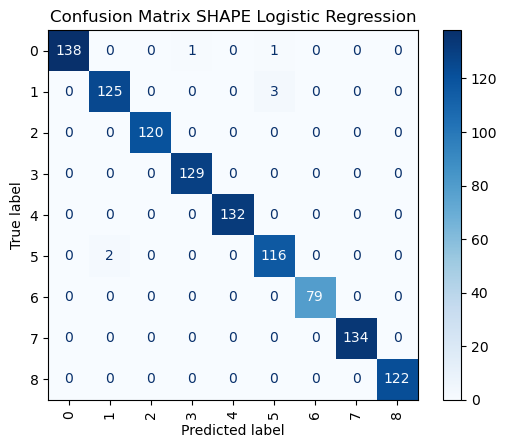

In [ ]:
conf_matrix = confusion_matrix(y_test_shape, y_pred_shape)

disp = ConfusionMatrixDisplay(conf_matrix)
plt.figure(figsize=(4,4))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix SHAPE Logistic Regression")
plt.xticks(rotation=90)
plt.show()

# Rendre le df plus réaliste

In [ ]:
# Définir les paramètres du bruit
mean = 0  
std_factor = 0.1  

# Calculer le bruit proportionnel à l'intensité
# Utilise la valeur absolue des intensités pour adapter l'écart-type du bruit
noise = np.random.normal(mean, std_factor, X_test.shape)
adapt_noise = np.random.normal(mean, std_factor * np.abs(X_test), X_test.shape)

# Ajouter le bruit aux données
X_test_noisy = X_test + noise
X_test_adapt_noisy = X_test + adapt_noise

In [ ]:
# Prédictions
y_pred = ridge_opt.predict(X_test_noisy)

# Calcul de la RMSE sur l'échelle standardisée
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error : {mse:.5f} \n")

# Inversion de la standardisation pour les prédictions et les valeurs réelles
n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))


# Calculer la RMSE pour chaque paramètre sur l'échelle originale
mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))

print(f"MSE pour log_n_Atoms : {mse_n_atoms_size_1[0]:.3f}")
print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]:.3f}")
print(f"MSE pour sqrt_eq_radius : {mse_eq_radius:.3f} \n")
print(f"Q2 pour log_n_Atoms : {Q2_n_atoms_size_1[0]:.3f}")
print(f"Q2 pour Size_parameters_1 : {Q2_n_atoms_size_1[1]:.3f}")
print(f"Q2 pour sqrt_log_eq_radius : {Q2_eq_radius}")

Mean Squared Error : 0.33764 

MSE pour log_n_Atoms : 0.014
MSE pour Size_parameters_1 : 1.702
MSE pour sqrt_eq_radius : 0.558 

Q2 pour log_n_Atoms : 0.996
Q2 pour Size_parameters_1 : 0.761
Q2 pour sqrt_log_eq_radius : [0.19807983]


In [ ]:
y_pred_noise = logistic_model.predict(X_test_noisy)

accuracy = accuracy_score(y_test_shape, y_pred_noise)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test_shape, y_pred_noise, target_names=label_encoder.classes_))

Accuracy: 0.975

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.97      0.96      0.96       140
                cuboctahedron       0.91      0.92      0.92       128
dihedral_rhombic_dodecahedron       0.99      0.99      0.99       120
                 dodecahedron       0.98      1.00      0.99       129
                  icosahedron       0.99      0.99      0.99       132
                   octahedron       0.92      0.93      0.93       118
         pentagonal_bipyramid       1.00      0.97      0.99        79
         rhombic_dodecahedron       1.00      1.00      1.00       134
                  tetrahedron       1.00      1.00      1.00       122

                     accuracy                           0.97      1102
                    macro avg       0.98      0.97      0.97      1102
                 weighted avg       0.97      0.97      0.97      1102



In [ ]:
# Prédictions
y_pred = ridge_opt.predict(X_test_adapt_noisy)

# Calcul de la RMSE sur l'échelle standardisée
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error : {mse:.5f} \n")

# Inversion de la standardisation pour les prédictions et les valeurs réelles
n_atoms_size_1_original_pred = scaler_n_atoms_size_1.inverse_transform(y_pred[:,0:2])
n_atoms_size_1_original_test = scaler_n_atoms_size_1.inverse_transform(y_test[:,0:2])
n_atoms_size_1_original_train = scaler_n_atoms_size_1.inverse_transform(y_train[:,0:2])

eq_radius_original_pred = scaler_eq_radius.inverse_transform(y_pred[:,2].reshape(-1,1))
eq_radius_original_test = scaler_eq_radius.inverse_transform(y_test[:,2].reshape(-1,1))
eq_radius_original_train = scaler_eq_radius.inverse_transform(y_train[:,2].reshape(-1,1))


# Calculer la RMSE pour chaque paramètre sur l'échelle originale
mse_n_atoms_size_1 = mean_squared_error(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, multioutput='raw_values')
mse_eq_radius = mean_squared_error(eq_radius_original_test, eq_radius_original_pred)

Q2_n_atoms_size_1 = q2_score(n_atoms_size_1_original_test, n_atoms_size_1_original_pred, n_atoms_size_1_original_train.mean(axis=0))
Q2_eq_radius = q2_score(eq_radius_original_test, eq_radius_original_pred, eq_radius_original_train.mean(axis=0))

print(f"MSE pour log_n_Atoms : {mse_n_atoms_size_1[0]:.3f}")
print(f"MSE pour Size_parameters_1 : {mse_n_atoms_size_1[1]:.3f}")
print(f"MSE pour sqrt_eq_radius : {mse_eq_radius:.3f} \n")
print(f"Q2 pour log_n_Atoms : {Q2_n_atoms_size_1[0]:.3f}")
print(f"Q2 pour Size_parameters_1 : {Q2_n_atoms_size_1[1]:.3f}")
print(f"Q2 pour sqrt_log_eq_radius : {Q2_eq_radius}")

Mean Squared Error : 0.37464 

MSE pour log_n_Atoms : 0.014
MSE pour Size_parameters_1 : 1.787
MSE pour sqrt_eq_radius : 0.630 

Q2 pour log_n_Atoms : 0.996
Q2 pour Size_parameters_1 : 0.749
Q2 pour sqrt_log_eq_radius : [0.09483342]


In [ ]:
y_pred_adapt_noise = logistic_model.predict(X_test_adapt_noisy)

accuracy = accuracy_score(y_test_shape, y_pred_adapt_noise)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test_shape, y_pred_adapt_noise, target_names=label_encoder.classes_))

Accuracy: 0.979

Classification Report:
                                precision    recall  f1-score   support

                      cubefcc       0.97      0.97      0.97       140
                cuboctahedron       0.96      0.93      0.94       128
dihedral_rhombic_dodecahedron       0.98      1.00      0.99       120
                 dodecahedron       0.98      1.00      0.99       129
                  icosahedron       1.00      0.99      1.00       132
                   octahedron       0.93      0.96      0.94       118
         pentagonal_bipyramid       1.00      0.99      0.99        79
         rhombic_dodecahedron       0.99      0.99      0.99       134
                  tetrahedron       1.00      0.98      0.99       122

                     accuracy                           0.98      1102
                    macro avg       0.98      0.98      0.98      1102
                 weighted avg       0.98      0.98      0.98      1102



In [ ]:
def introduce_nans(X, perc=10, random_state=42):
    Xc=X.to_numpy()
    num_nans=int(perc*Xc.shape[1]/100)
    np.random.seed(random_state)  # Pour la reproductibilité
    X_nan = Xc.copy()
    n_samples, n_features = Xc.shape

    for i in range(n_samples):
        # Sélectionner aléatoirement les indices de colonnes à rendre NaN
        nan_columns = np.random.choice(n_features, num_nans, replace=False)
        X_nan[i, nan_columns] = np.nan  # Remplacer par NaN
    
    return X_nan

In [ ]:
from sklearn.impute import SimpleImputer

X_test_nan = introduce_nans(X_test, perc=10, random_state=42)

imputer = SimpleImputer(strategy='mean')  # Utilisation de la moyenne pour l'interpolation
X_imputed = imputer.fit_transform(X_test_nan)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

# Notes

q_step, q_min, q_max, polydispersity --> inutiles\
b_iso -->  que represente cette variable ??\
\
Solid_class, Element, Shape ,Size_parameters, b_iso ---> variables qualitatives\
Distance, Eq_Radius, n_Atoms ---> variables quantitatives\
q, Intensities ---> tableaux numpy (size = 1999), tracé de l'intensité en fonction de q\
\
size with SAXS and shape with WAXS, les deux avec SWAXS size = première partie de la courbe et shape = deuxième partie de la courbe (grossièrement)\